In [4]:
# My neural net model
from neural_net import neural_net
from vis_utils import plotStats, plotData
from gradient_utils import gradient_difference
from tuning_utils import tuning_hyper_parameter

# Linear algebra library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,1])

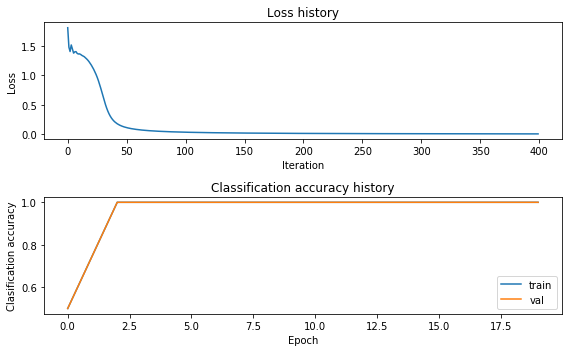

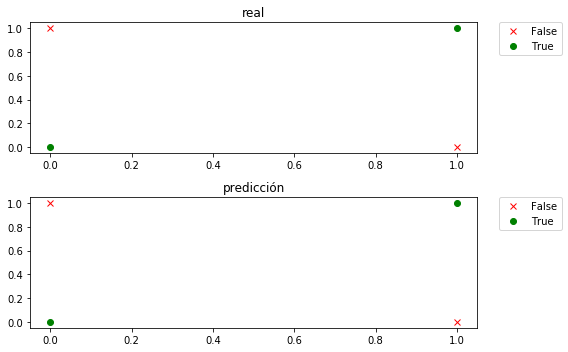

In [7]:
net_params = {'il':2,'hl1':2,'ol':2}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
net = neural_net(net_params, activation_function= activ_function,
                 cost_function= cost_function, std= 1)
results = net.train_sgd_momentum(X, y, X, y, learning_rate=2.1, 
                                 learning_rate_decay=1, reg = 0.0,
                                 max_iter = 400, batch_size = 2, verbose =  True, rho=0.7, stochastic = False, epoch = 20)
plotStats(results)
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [8]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,0])

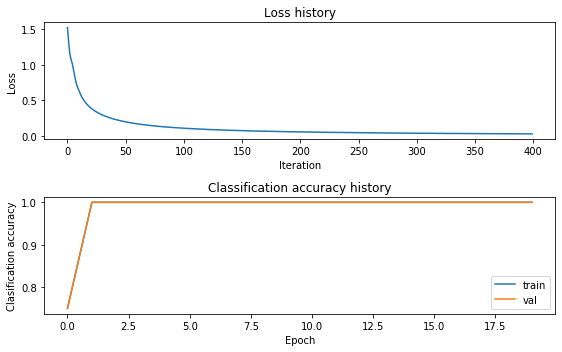

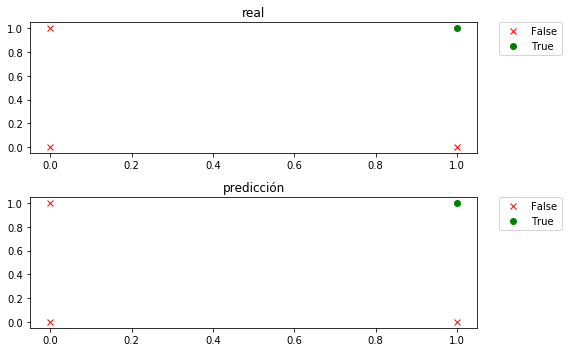

In [9]:
net_params = {'il':2,'ol':2}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
net = neural_net(net_params, activation_function= activ_function,
                 cost_function= cost_function, std= 0.5)

results = net.train_sgd_momentum(X, y, X, y, learning_rate=0.9, 
                                 learning_rate_decay=0.99, reg = 0.0,
                                 max_iter = 400, batch_size = 1, verbose =  True, rho = 0.70, stochastic = False)

plotStats(results)
y_pred = net.predict(X)
plotData(X, y, y_pred)